# Joint Probability Distributions - Python

##### Multinomial with 3 (or more)

- $x_{1}$, $x_{2}$, $x_{3}$ random variable outcome
- $p_{X_{1}}$, $p_{X_{2}}$, $p_{X_{3}}$ probabilities of the outcomes
- $n$ number of trials

In [1]:
import math

def multinom(x1,x2,x3,px1,px2,px3, n):
    k = math.factorial(n)/(math.factorial(x1)*math.factorial(x2)*math.factorial(x3))
    t = (px1**x1)*(px2**x2)*(px3**x3)
    return(k*t)

In [2]:
multinom(3,5,2,1/6,2/6,3/6,10)

0.01200274348422496

In [3]:
import math

def multinom(xi,pxi,n):
    k = 0
    t = (px1**x1)*(px2**x2)*(px3**x3)
    return(k*t)

In [4]:
from scipy.special import factorial as scifact
import numpy as np

def m_multinom(xi, pxi, n):    
    a_xi = np.array(xi)
    a_pxi = np.array(pxi)
    n = a_xi.sum()
    k = scifact(n)/np.prod(scifact(a_xi))
    t = np.prod(a_pxi ** a_xi)
    return(k*t)

In [5]:
xi = [3,5,0]
pi = [1/6,2/6,3/6]

m_multinom(xi, pi, 10)

0.0010669105319311076

In [6]:
a = np.array(xi)
b = np.array(pi)

In [7]:
from scipy.special import factorial as scifact

In [8]:
np.prod(b ** a)

1.9051973784484063e-05

In [9]:
np.prod(a)

0

In [10]:
from scipy.special import factorial
np.prod(factorial(a))

720.0

### The Central Limit Theorem

Suppose $X_{1}, X_{2}, \dots, X_{n}$ are $n$ independed and identically distributed random variables each with mean $\mu$ and variance $\sigma^{2}$. Consider two derived random variables $Y$ and $Z$ which are respectively the sum and mean of $X_{1}, X{2}, \dots, X_{n}$:

$$Y = X_{1} + X_{2} + \dots + X_{n} \hspace{1cm} \text{and} \hspace{1cm} Z = \frac{X_{1} + X_{2} + \dots + X_{n}}{n}$$

then 

$$E(Y) = n\mu, \text{ } Var(Y)= n\sigma^{2} \hspace{1cm} \text{and} \hspace{1cm} E(Z) = \mu, \text{ } Var(Z) = \frac{\sigma^{2}}{n}$$

The Central Limit Theorem addresses the problem of how the derived random variables $Y$ and $Z$ are distributed and asserts that, as $n$ increases indefinitely, both $Y$ and $Z$ tend to a Normal distribution whatever the distribution of the individual $X_{i}$. More specifically

$$Y \text{ tends to } N(n\mu, n\sigma^{2}) \hspace{1cm} \text{and} \hspace{1cm}  Z \text{ tends to } N(\mu, \frac{\sigma^{2}}{n})$$

In many cases $Y$ and $Z$ are approximately Normal for remarkably small values of $n$.

### Bivariate Distribution -- Reference Discrete Example

In introducing examples of two continuous random variables it is useful to employ a reference example of two discrete random variables. Consider two discrete random variables $X$ and $Y$ whose values are $r$ and $s$ respectively and suppose that the probability of the event $\{X=r\} \cap \{Y=s\}$ is given by:

$$
\begin{equation}
  P(X=r,Y=s) =
    \begin{array}{ll}
      \frac{r+s}{48}, \text{if } 0 \leq r, s \leq 3;\\
      0, \text{ } \text{otherwise}\\
    \end{array}       
\end{equation}
$$


### Bivariate Distributions — Continuous Random Variables

When there are two continuous random variables, the equivalent of the two-dimensional array is a region of the $x–y$ (cartesian) plane. Above the plane, over the region of interest, is a surface which represents the probability density function associated with a bivariate distribution.

Suppose $X$ and $Y$ are two continuous random variables and that their values, $x$ and $y$ respectively, are constrained to lie within some region $R$ of the cartesian plane. The associated probability density function has the general form $f_{XY}(x,y)$ and, regarding this function as defining a surface over region $R$, axiom II of probabilities requires:

$$\int \int_{R} f_{XY}(x,y)dxdy = 1$$

This is equivalent to requiring that the volume under the surface is 1.

## Bivariate Normal Distribution

Before going into the details of the Python implementation, I think it's worth to go through some basic definitions that will help understanding what the calculations are about. These part is based on Chapter 2 of Regression Models for Data Science in R by Brian Caffo.

#### The empirical mean

We write $x_{1}, x_{2}, \dots, x_{n}$ to describe $n$ data points. The empirical mean is a measure of center of our data. Under sampling assumptions, it estimates a population mean of interest. Define the empirical mean as

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_{i}$$

Notice if we subtract the mean from data points, we get data that has mean 0. That is, if we define

$$\tilde x_{i} = x_{i} - \bar{x}$$

then the mean of $\tilde x_{i}$ is 0. This process is called **centering** the random variables. Recall that the empirical mean is the least squares solution for minimizing 

$$\sum_{i=1}^{n}(x_{i} - \mu)^{2}$$

#### The empirical standard deviation and variance

The variance and standard deviation are measures of how spread out our data is. Under sampling assumptions, they estimate variability in the population. We define the empirical variance as:

$$S^{2} = \frac{1}{n-1}\sum_{i=1}^{n}(x_{i}-\bar{x})^{2} = \frac{1}{n-1}\left(\sum_{i=1}^{n}x_{i}^{2}-n\bar{x}^2\right)$$

The empirical standard deviation is defined as $S = \sqrt{S^{2}}$.

Notice that the standard deviation has the same units as the data. The data defined by $x_{i}/s$ have empirical standard deviation 1. This is called **scaling the data**.

#### Normalization

We can combine centering and scaling of data as follows to get normalized data. In particular, the data defined by:

$$z_{i} = \frac{x_{i}-\bar{x}}{s}$$

has empirical mean zero and empirical standard deviation 1. The process of centering then scaling the data is called **normalizing the data**. Normalized data are centered at 0 and have units equal to standard deviations of the original data. Example, a value of 2 from normalized data means that data point was two standard deviations larger than the mean. Normalization is very useful for creating data that comparable across experiments by getting rid of any shifting or scaling effects.

#### The empirical covariance

We are interested in how the data (i.e. the variables of interest) **covary**. This is estimated by the **empirical covariance**. Consider now when we have pairs of data, ($x_{i}, y_{i}$) . Their empirical covariance is defined as:

$$Cov(X,Y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y}) = \frac{1}{n-1}\left(\sum_{i=1}^{n} x_{i}y_{i} -n\bar{x}\bar{y}\right)$$

This measure is of limited utility, since its units are the product of the units of the two variables. A more useful definition normalizes the two variables first.

The **correlation** is defined as:

$$Cor(X,Y) = \frac{Cov(X,Y)}{S_{x}S_{y}}$$

where $S_{x}$ and $S_{y}$ are the estimates of standard deviations for the $X$ observations and $Y$ observations, respectively. The correlation is simply the covariance of the separately normalized $X$ and $Y$ data. Because the data have been normalized, the correlation is a unit free quantity and thus has more of a hope of being interpretable across settings.

#### Some facts about correlation

First, the order of the arguments is irrelevant i.e. $Cov(X,Y) = Cov(Y,X)$. Secondly, it has to be between -1 and 1, $-1 \leq Cor(X,Y) \leq 1$. Thirdly, the correlation is exactly -1 or 1 only when the observations fall perfectly on a negatively or positively sloped, line, respectively. Fourthly, $Cor(X,Y)$ measures the strength of the linear relationship between the two variables, with stronger relationships as $Cor(X,Y)$ heads towards -1 or 1. Finally, $Cor(X,Y) = 0$ implies no linear relationship.

##### Resources

- [Bivariate Normal Distribution I](https://mathworld.wolfram.com/BivariateNormalDistribution.html)
- [Multivariate Normal Distribution](https://python.quantecon.org/multivariate_normal.html)
- [Multivariate normal distribution - notes on Machine Learning](https://peterroelants.github.io/posts/multivariate-normal-primer/)
- [Lesson 4: Multivariate Normal Distribution](https://online.stat.psu.edu/stat505/book/export/html/636)

##### scipy.stats.multivariate_normal

If we use the `multivariate_normal` object from `scipy.stats` package, we need to specify the covariance matrix of the distribution (that must be [symmetric and positive-semidefinite for proper sampling](https://docs.scipy.org/doc//numpy-1.9.1/reference/generated/numpy.random.multivariate_normal.html)). In the case we are given the mean $\mu$, standard deviation $\sigma$ and correlation value $\rho$ of two random variables, how can I compute the corresponding bivariate distribution?

In [11]:
mu = np.array([17.0, 23.0])
sigma = np.array([2.0,3.0])
rho = 0.4

 - **Covariance Matrix**. The covariance matrix is defined by
 
$$
\begin{equation}
V_{i,j} = 
\begin{pmatrix}
\sigma_{1}^{2} & \rho \sigma_{1} \sigma_{2} \\
\rho \sigma_{2} \sigma_{1} & \sigma_{2}^{2}
\end{pmatrix}
\end{equation}
$$

In [12]:
# https://online.stat.psu.edu/stat505/book/export/html/636
# Covariance Matrix

def cov_matrix(sigma, rho):
    a = np.diag((rho*sigma[0]*sigma[1],rho*sigma[1]*sigma[0]))
    return(np.diag((sigma[0]**2,sigma[1]**2)) + a[:,[1,0]])

In [13]:
cov_matrix(sigma, -0.4)

array([[ 4. , -2.4],
       [-2.4,  9. ]])

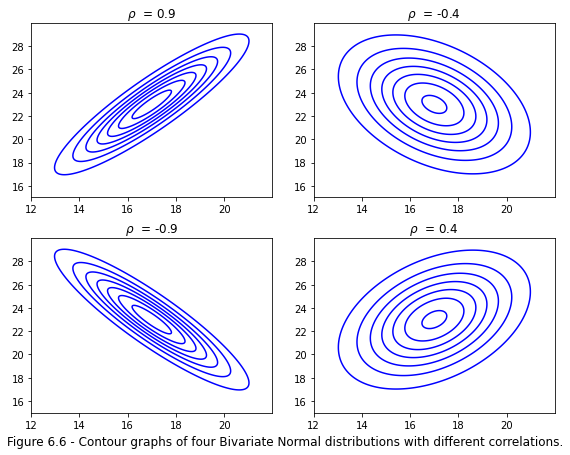

In [14]:
# https://www.askpython.com/python-modules/matplotlib/matplotlib-subplots

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

n = 500

x = np.linspace(12, 22, n, endpoint=False)
y = np.linspace(15, 30, n, endpoint=False)

cov_1 = cov_matrix(sigma, 0.9)
cov_2 = cov_matrix(sigma, -0.4)
cov_3 = cov_matrix(sigma, -0.9)
cov_4 = cov_matrix(sigma, 0.4)

xv, yv = np.meshgrid(x, y)
pos = np.empty((n, n, 2))
pos[:, :, 0] = xv
pos[:, :, 1] = yv

pdf_1 = multivariate_normal.pdf(pos, mu, cov_1)
pdf_2 = multivariate_normal.pdf(pos, mu, cov_2)
pdf_3 = multivariate_normal.pdf(pos, mu, cov_3)
pdf_4 = multivariate_normal.pdf(pos, mu, cov_4)

fig, ax =  plt.subplots(nrows = 2, ncols = 2, figsize=(8,6));
# ax = fig.add_axes((0.1, 0.2, 0.8, 0.7));
fig.tight_layout(h_pad=2)

txt = 'Figure 6.6 - Contour graphs of four Bivariate Normal distributions with different correlations.';

# plt.subplot(2,2,1)
# plt.title('$\\rho$  = 0.9')
# plt.contour(xv,yv,pdf_1,colors = 'blue');

ax[0, 0].set_title('$\\rho$  = 0.9')
ax[0, 0].contour(xv,yv,pdf_1,colors = 'blue');

# plt.subplot(2,2,2)
# plt.set_title('$\\rho$  = -0.4')
# plt.contour(xv,yv,pdf_2,colors = 'blue');

ax[0, 1].set_title('$\\rho$  = -0.4')
ax[0, 1].contour(xv,yv,pdf_2,colors = 'blue');

# plt.subplot(2,2,3)
# plt.title('$\\rho$  = -0.9')
# plt.contour(xv,yv,pdf_3,colors = 'blue');

ax[1, 0].set_title('$\\rho$  = -0.9')
ax[1, 0].contour(xv,yv,pdf_3,colors = 'blue');

# plt.subplot(2,2,4)
# plt.title('$\\rho$  = 0.4')
# plt.contour(xv,yv,pdf_4,colors = 'blue');

ax[1, 1].set_title('$\\rho$  = 0.4')
ax[1, 1].contour(xv,yv,pdf_4,colors = 'blue');

plt.figtext(0.5, -0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);


In [15]:
xv.shape

(500, 500)

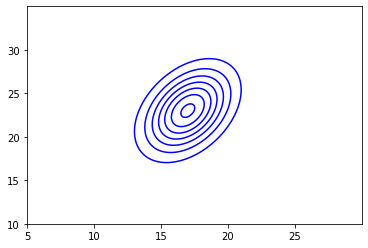

In [16]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    # rho = sigmaxy/(sigmax*sigmay)
    rho = sigmaxy
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(5.0, 30.0, delta)
y = np.arange(10.0, 35.0, delta)
X, Y = np.meshgrid(x, y)

Z =  bivariate_normal(X, Y, 
                      2.0, 3.0, 17.0, 23.0, 0.4)
plt.contour(X,Y,Z,colors = 'blue');

In [17]:
xv

array([[12.  , 12.02, 12.04, ..., 21.94, 21.96, 21.98],
       [12.  , 12.02, 12.04, ..., 21.94, 21.96, 21.98],
       [12.  , 12.02, 12.04, ..., 21.94, 21.96, 21.98],
       ...,
       [12.  , 12.02, 12.04, ..., 21.94, 21.96, 21.98],
       [12.  , 12.02, 12.04, ..., 21.94, 21.96, 21.98],
       [12.  , 12.02, 12.04, ..., 21.94, 21.96, 21.98]])

In [18]:


sns.kdeplot(data=geyser, x="waiting", y="duration")

NameError: name 'sns' is not defined